# Web Scraping Last 20 Regular Season NBA Players Stats

This little scraping project is to demostrate how to scraped last 20 regular season NBA players stats off ESPN websites and export in a csv format for futher analysis. 

First of all, we will need to inport the beautiful soup, urllib.request, pandas and csv packages.

In [2]:
import bs4 as bs        
import urllib.request    
import csv 
import pandas as pd

Looking at the ESPN website, I found out that https://www.espn.com/nba/teams will display each team stats url. We can use this website to scraped all the individual team stats url.

![Screenshot](https://raw.githubusercontent.com/joeychen35/Web-Scraping/master/Screenshot%202020-06-21%2017.05.56.png)

In [3]:
domain_url = 'https://www.espn.com' # This will be added with the team url to form the url we want to scraped

the_url = 'https://www.espn.com/nba/teams' # This is the page we are scraping team urls from

all_team_stat_url = []
req = urllib.request.Request(the_url)
sauce = urllib.request.urlopen(req).read()
soup = bs.BeautifulSoup(sauce, 'lxml')
for i in range(30): # There are 30 nba teams in total
    stat_href = soup.find_all('div', attrs = {'class' : 'pl3'})[i].find_all('a', attrs = {'class':'AnchorLink'})[1].get('href') 
    stat_href_split = (stat_href.rsplit('/',1)[0])# getting rid of team name after the team abreviation
    for i in range(1,21):
        if i < 10: 
            season_url = '/season/200{}'.format(i)
        else:
            season_url = '/season/20{}'.format(i)
        team_stat_url = domain_url + stat_href_split + season_url # each team url that we are going to scraped
        all_team_stat_url.append(team_stat_url)
print('Each team url:\n')    
print(*all_team_stat_url[:30], sep = '\n')


Each team url:

https://www.espn.com/nba/team/stats/_/name/bos/season/2001
https://www.espn.com/nba/team/stats/_/name/bos/season/2002
https://www.espn.com/nba/team/stats/_/name/bos/season/2003
https://www.espn.com/nba/team/stats/_/name/bos/season/2004
https://www.espn.com/nba/team/stats/_/name/bos/season/2005
https://www.espn.com/nba/team/stats/_/name/bos/season/2006
https://www.espn.com/nba/team/stats/_/name/bos/season/2007
https://www.espn.com/nba/team/stats/_/name/bos/season/2008
https://www.espn.com/nba/team/stats/_/name/bos/season/2009
https://www.espn.com/nba/team/stats/_/name/bos/season/2010
https://www.espn.com/nba/team/stats/_/name/bos/season/2011
https://www.espn.com/nba/team/stats/_/name/bos/season/2012
https://www.espn.com/nba/team/stats/_/name/bos/season/2013
https://www.espn.com/nba/team/stats/_/name/bos/season/2014
https://www.espn.com/nba/team/stats/_/name/bos/season/2015
https://www.espn.com/nba/team/stats/_/name/bos/season/2016
https://www.espn.com/nba/team/stats/_/na

Now we have all the teams url, we will begin scraping the players stats from each team in each season and append it to the scaped_data dictonary.

In [4]:
stats_we_are_scraping = ["Season","Team", "Name", "GP", "GS","MIN", "PTS","OR", "DR", 
                          "REB", "AST", "STL", "BLK", "TO", "PF", "AST/TO", "PER"]  # declaring all the stats we are scraping

scraped_data = {key : [] for key in stats_we_are_scraping} #putting all fields to one set of dectionary

for i, url in enumerate(all_team_stat_url, start = 1): 
    req = urllib.request.Request(url)
    sauce = urllib.request.urlopen(req).read()
    soup = bs.BeautifulSoup(sauce, 'lxml')
    
    season = soup.find('h1', attrs = {'class':'headline headline__h1 dib'}).text.split('Stats ')[1]
    team_name = soup.find('span', attrs = {'class':'db pr3 nowrap'}).text + ' ' + soup.find('span', attrs = {'class':'db fw-bold'}).text
    name_list = soup.find_all('a', attrs = {'class': 'AnchorLink', 'tabindex':'0', 'data-player-uid': True})
    if i % 20 == 0:
        print("Done Scraping:", team_name, "Player's last 20 Regular Season stats -- ", int(i/20) , "/", int(len(all_team_stat_url)/20))
    
    for i in range(int(len(name_list)/2)):
        scraped_data['Season'].append(season + ' Season')
        scraped_data['Team'].append(team_name)
        scraped_data['Name'].append(name_list[i].text)
        all_stats = soup.find_all('tr', attrs = {'class':'Table__TR Table__TR--sm Table__even','data-idx' : i})[1].find_all('span')
        scraped_data['GP'].append(int(all_stats[0].text)) #changing str to int to make it sortable
        scraped_data['GS'].append(int(all_stats[1].text))
        scraped_data['MIN'].append(float(all_stats[2].text))
        scraped_data['PTS'].append(float(all_stats[3].text))
        scraped_data['OR'].append(float(all_stats[4].text))
        scraped_data['DR'].append(float(all_stats[5].text))
        scraped_data['REB'].append(float(all_stats[6].text))
        scraped_data['AST'].append(float(all_stats[7].text))
        scraped_data['STL'].append(float(all_stats[8].text))
        scraped_data['BLK'].append(float(all_stats[9].text))
        scraped_data['TO'].append(float(all_stats[10].text))
        scraped_data['PF'].append(float(all_stats[11].text))
        scraped_data['AST/TO'].append(float(all_stats[12].text))
        scraped_data['PER'].append(float(all_stats[13].text))




Done Scraping: Boston Celtics Player's last 20 Regular Season stats --  1 / 30
Done Scraping: Brooklyn Nets Player's last 20 Regular Season stats --  2 / 30
Done Scraping: New York Knicks Player's last 20 Regular Season stats --  3 / 30
Done Scraping: Philadelphia 76ers Player's last 20 Regular Season stats --  4 / 30
Done Scraping: Toronto Raptors Player's last 20 Regular Season stats --  5 / 30
Done Scraping: Chicago Bulls Player's last 20 Regular Season stats --  6 / 30
Done Scraping: Cleveland Cavaliers Player's last 20 Regular Season stats --  7 / 30
Done Scraping: Detroit Pistons Player's last 20 Regular Season stats --  8 / 30
Done Scraping: Indiana Pacers Player's last 20 Regular Season stats --  9 / 30
Done Scraping: Milwaukee Bucks Player's last 20 Regular Season stats --  10 / 30
Done Scraping: Denver Nuggets Player's last 20 Regular Season stats --  11 / 30
Done Scraping: Minnesota Timberwolves Player's last 20 Regular Season stats --  12 / 30
Done Scraping: Oklahoma City T

Once we scraped all the data in to Scraped_data dictionary, we can create a dataframe using Pandas and export to a CSV file.

In [5]:
df = pd.DataFrame(scraped_data)
df.to_csv('01-20 Regular Season NBA Players Stats.csv') #export stats to a csv file
df.index += 1 #setting index starting from 1 
df.head(30)

,Season,Team,Name,GP,GS,MIN,PTS,OR,DR,REB,AST,STL,BLK,TO,PF,AST/TO,PER
1,2000-01 Season,Boston Celtics,Paul Pierce,82,82,38.0,25.3,1.1,5.2,6.4,3.1,1.7,0.8,3.2,3.1,1.0,0.0
2,2000-01 Season,Boston Celtics,Antoine Walker,81,81,41.9,23.4,1.9,7.0,8.9,5.5,1.7,0.6,3.7,3.1,1.5,0.0
3,2000-01 Season,Boston Celtics,Bryant Stith,78,74,32.1,9.7,0.8,2.8,3.6,2.2,1.2,0.2,1.2,2.3,1.9,0.0
4,2000-01 Season,Boston Celtics,Kenny Anderson,33,28,25.7,7.5,0.5,1.7,2.2,4.1,1.3,0.1,1.6,1.9,2.6,0.0
5,2000-01 Season,Boston Celtics,Vitaly Potapenko,82,7,23.2,7.5,2.5,3.5,6.0,0.8,0.6,0.3,1.3,2.8,0.6,0.0
6,2000-01 Season,Boston Celtics,Eric Williams,81,11,21.5,6.6,0.8,1.8,2.6,1.4,0.8,0.2,0.9,2.2,1.5,0.0
7,2000-01 Season,Boston Celtics,Tony Battie,40,25,21.1,6.5,1.8,4.0,5.8,0.4,0.7,1.5,0.9,3.2,0.4,0.0
8,2000-01 Season,Boston Celtics,Milt Palacio,58,6,19.7,5.9,0.4,1.3,1.8,2.6,0.8,0.0,1.4,1.4,1.9,0.0
9,2000-01 Season,Boston Celtics,Doug Overton,7,1,20.6,5.4,0.4,1.7,2.1,2.7,0.6,0.0,1.9,2.1,1.5,0.0
10,2000-01 Season,Boston Celtics,Chris Carr,35,0,8.8,4.8,0.3,0.9,1.3,0.3,0.1,0.1,0.5,1.3,0.6,0.0


We could perform some analysis on this dataframe. For instance, we could find out the most efficient player in the league in last 20 years. (Please note, I elect only player who play more than 20 games and average more than 20 mins per game can qualify. This will have a better representation of the efficiency ranking in the league.)

In [112]:
df_gp20_min20 = df.loc[(df['GP'] > 20) & (df['MIN'] > 20),]
df_gp20_min20 = df_gp20_min20.sort_values('PER', ascending = False)
df_gp20_min20.head(10)

,Season,Team,Name,GP,GS,MIN,PTS,OR,DR,REB,AST,STL,BLK,TO,PF,AST/TO,PER
2088,2008-09 Season,Cleveland Cavaliers,LeBron James,81,81,37.7,28.4,1.3,6.3,7.6,7.2,1.7,1.1,3.0,1.7,2.4,31.76
3329,2019-20 Season,Milwaukee Bucks,Giannis Antetokounmpo,57,57,30.9,29.6,2.3,11.5,13.7,5.8,1.0,1.0,3.7,3.0,1.6,31.71
7572,2012-13 Season,Miami Heat,LeBron James,76,76,37.9,26.8,1.3,6.8,8.0,7.3,1.7,0.9,3.0,1.4,2.4,31.67
5188,2015-16 Season,Golden State Warriors,Stephen Curry,79,79,34.2,30.1,0.9,4.6,5.4,6.7,2.1,0.2,3.3,2.0,2.0,31.56
2104,2009-10 Season,Cleveland Cavaliers,LeBron James,76,76,39.0,29.7,0.9,6.4,7.3,8.6,1.6,1.0,3.4,1.6,2.5,31.19
7753,2002-03 Season,Orlando Magic,Tracy McGrady,75,74,39.4,32.1,1.6,4.9,6.5,5.5,1.7,0.8,2.6,2.1,2.1,31.01
3305,2018-19 Season,Milwaukee Bucks,Giannis Antetokounmpo,72,72,32.8,27.7,2.2,10.3,12.5,5.9,1.3,1.5,3.7,3.2,1.6,30.95
9746,2014-15 Season,New Orleans Pelicans,Anthony Davis,68,68,36.1,24.4,2.5,7.7,10.2,2.2,1.5,2.9,1.4,2.1,1.6,30.89
7556,2011-12 Season,Miami Heat,LeBron James,62,62,37.5,27.1,1.5,6.4,7.9,6.2,1.9,0.8,3.4,1.5,1.8,30.80
4189,2016-17 Season,Oklahoma City Thunder,Russell Westbrook,81,81,34.6,31.6,1.7,9.0,10.7,10.4,1.6,0.4,5.4,2.3,1.9,30.70


We could also perform some data exploration using matplotlib. Lets look at the distribution of PER for the last 20 years. We can see most player's PER falls between 10 ~ 15. 

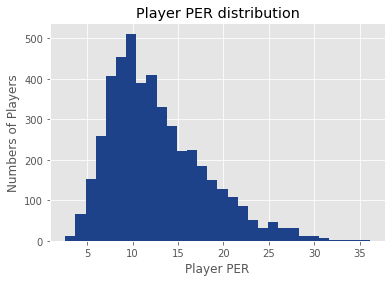

In [133]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')

plt.hist(df_gp20_min20['PTS'], bins = 30, color = ('#1d428a'))
plt.xlabel('Player PER')
plt.ylabel('Numbers of Players')
plt.title('Player PER distribution')
plt.show()

Lets look at the top10 efficient players stats. From left to right, the most efficent player in the last 20 years is Lebron James in 2008-2009 season. Among the ten most efficient players, James Harden average the most point per game. 

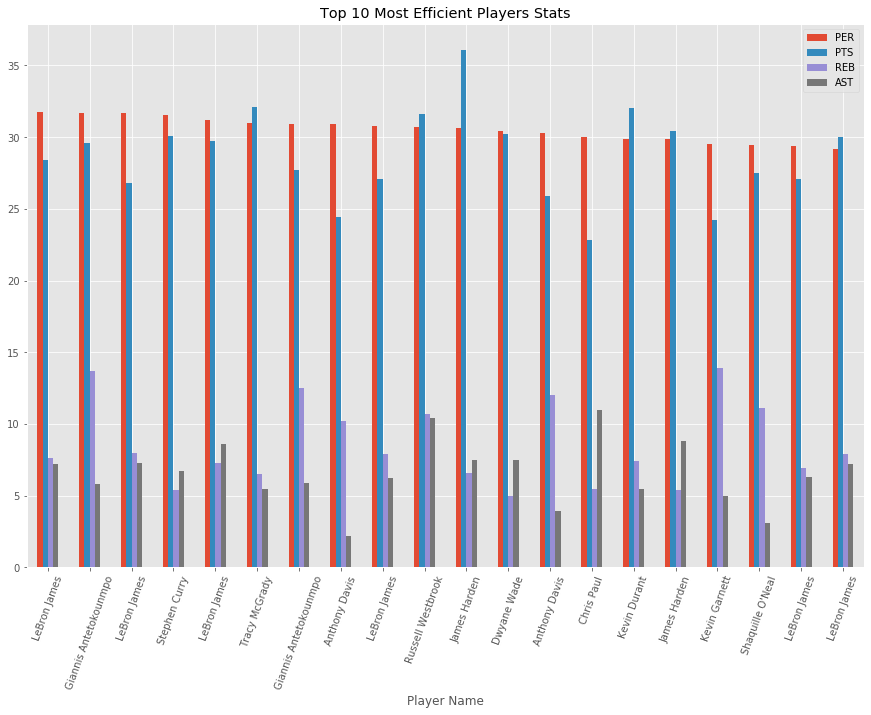

In [127]:
df_top10per = df_gp20_min20.head(20)
df_top10per.plot.bar(x = 'Name', y = ['PER','PTS','REB','AST'], figsize = (15,10))

plt.title('Top 10 Most Efficient Players Stats')
plt.xlabel('Player Name')
plt.xticks(rotation=70)
plt.legend(fontsize = 10)
plt.show()

We could also look at who average double double in the last 20 seasons. We find out that only 237 out of 10216 players average double double in last 20 seasons.

In [110]:
df_pts_reb = df_gp20_min20.loc[(df['PTS'] > 10) & (df['REB'] >10 ), ] #Players who average double double in PTS and REB
df_pts_ast = df_gp20_min20.loc[(df['PTS'] > 10) & (df['AST'] >10 ), ] #Players who average double double in PTS and AST

df_averaging_dd = df_pts_reb.append(df_pts_ast) # Appending both dataframe together
print('{} out of {} players average double double in last 20 seasons'.format(len(df_averaging_dd), len(df)))
print('\n\n\nPlayer who average double double (Only show 10 players)')
df_averaging_dd.head(10) #sort by PER

237 out of 10216 players average double double in last 20 seasons



Player who average double double (Only show 10 players)


,Season,Team,Name,GP,GS,MIN,PTS,OR,DR,REB,AST,STL,BLK,TO,PF,AST/TO,PER
3329,2019-20 Season,Milwaukee Bucks,Giannis Antetokounmpo,57,57,30.9,29.6,2.3,11.5,13.7,5.8,1.0,1.0,3.7,3.0,1.6,31.71
3305,2018-19 Season,Milwaukee Bucks,Giannis Antetokounmpo,72,72,32.8,27.7,2.2,10.3,12.5,5.9,1.3,1.5,3.7,3.2,1.6,30.95
9746,2014-15 Season,New Orleans Pelicans,Anthony Davis,68,68,36.1,24.4,2.5,7.7,10.2,2.2,1.5,2.9,1.4,2.1,1.6,30.89
4189,2016-17 Season,Oklahoma City Thunder,Russell Westbrook,81,81,34.6,31.6,1.7,9.0,10.7,10.4,1.6,0.4,5.4,2.3,1.9,30.70
9837,2018-19 Season,New Orleans Pelicans,Anthony Davis,56,56,33.0,25.9,3.1,8.9,12.0,3.9,1.6,2.4,2.0,2.4,1.9,30.32
3747,2003-04 Season,Minnesota Timberwolves,Kevin Garnett,82,82,39.4,24.2,3.0,10.9,13.9,5.0,1.5,2.2,2.6,2.5,1.9,29.50
5669,2002-03 Season,Los Angeles Lakers,Shaquille O'Neal,67,66,37.8,27.5,3.9,7.2,11.1,3.1,0.6,2.4,2.9,3.4,1.1,29.43
9814,2017-18 Season,New Orleans Pelicans,Anthony Davis,75,75,36.4,28.1,2.5,8.6,11.1,2.3,1.5,2.6,2.2,2.1,1.1,28.98
3764,2004-05 Season,Minnesota Timberwolves,Kevin Garnett,82,82,38.1,22.2,3.0,10.5,13.5,5.7,1.5,1.4,2.7,2.5,2.1,28.29
9788,2016-17 Season,New Orleans Pelicans,Anthony Davis,75,75,36.1,28.0,2.3,9.5,11.8,2.1,1.3,2.2,2.4,2.2,0.9,27.59
